In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("avocado_ripeness_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


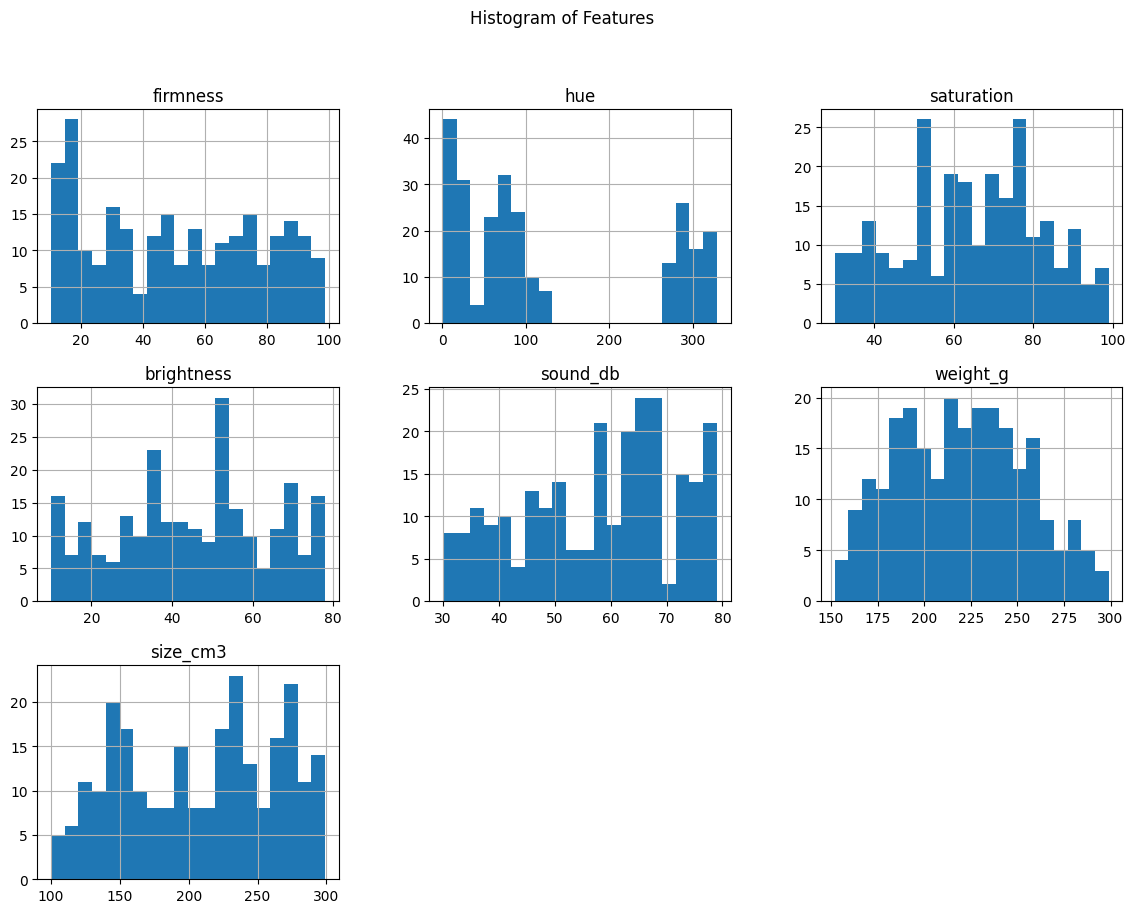

In [4]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histogram of Features")
plt.show()

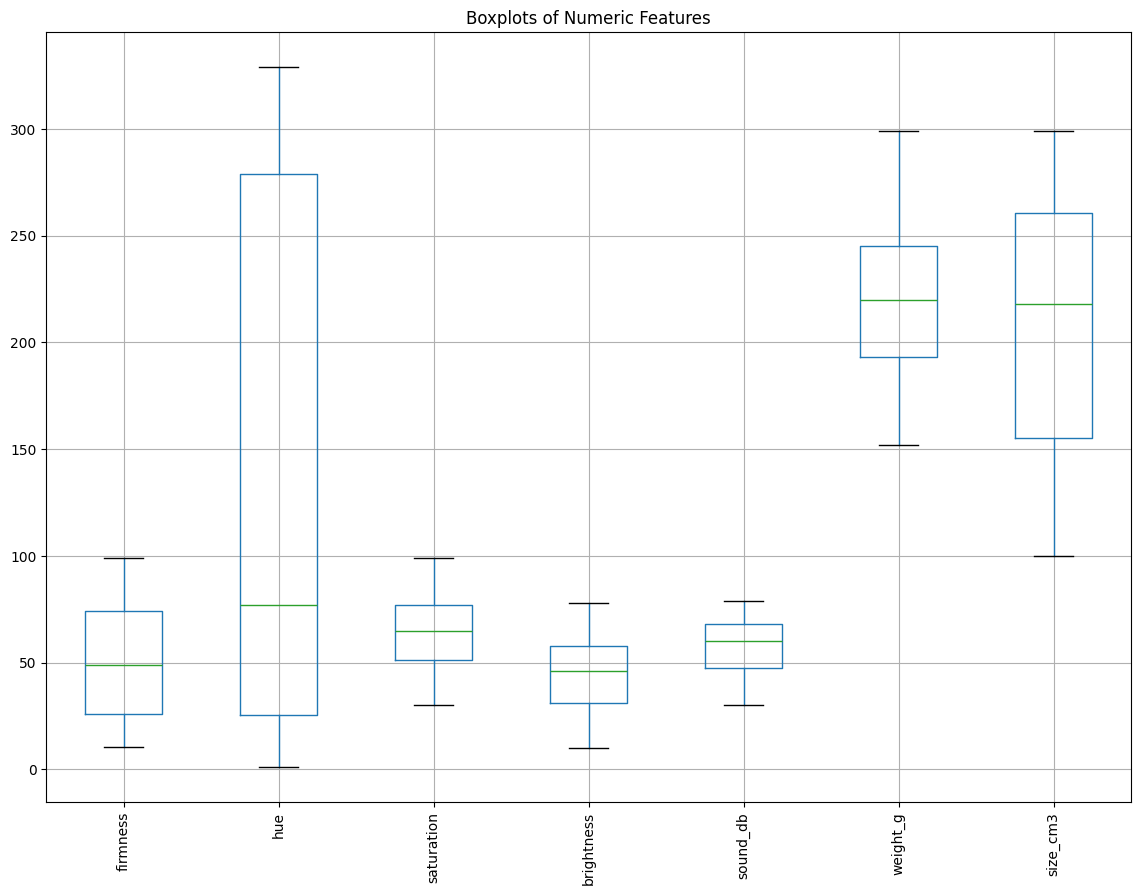

In [5]:
plt.figure(figsize=(14, 10))
df.select_dtypes(include='number').boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=90)
plt.show()

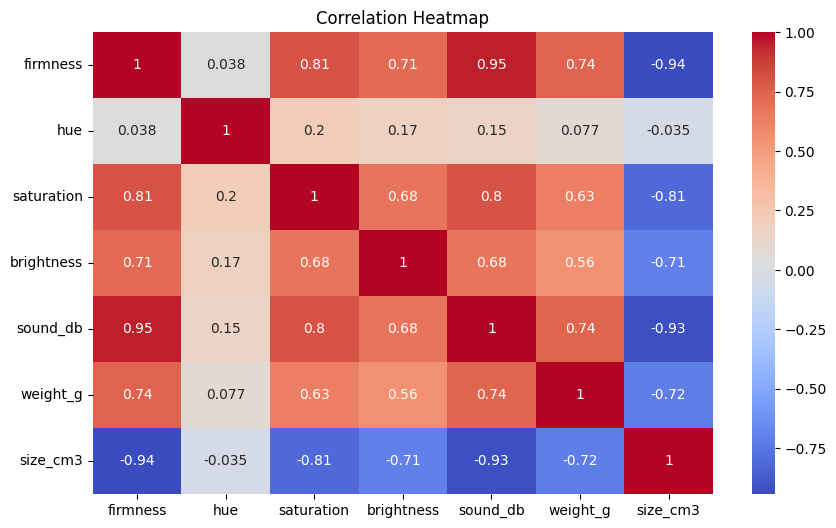

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [9]:
X = df.drop('ripeness', axis=1)  # replace 'ripeness' with actual target column
y = df['ripeness']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
y.value_counts(normalize=True)

ripeness
4    0.2
3    0.2
2    0.2
0    0.2
1    0.2
Name: proportion, dtype: float64

In [14]:
baseline_accuracy = y.value_counts(normalize=True).max()

In [15]:
baseline_accuracy

np.float64(0.2)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = model.predict(X_test_scaled)

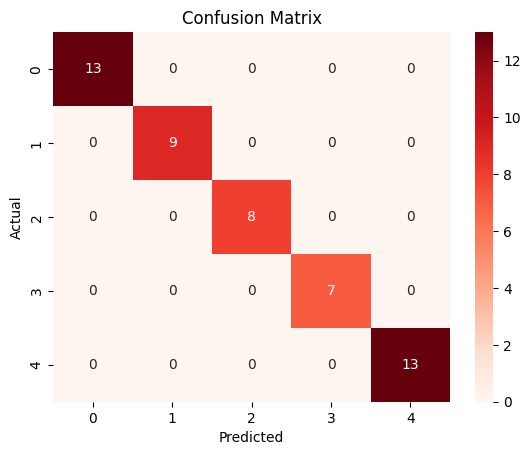

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00         8\n           3       1.00      1.00      1.00         7\n           4       1.00      1.00      1.00        13\n\n    accuracy                           1.00        50\n   macro avg       1.00      1.00      1.00        50\nweighted avg       1.00      1.00      1.00        50\n'